# Regressive models

In this notebook we try using standard regressive modelling approaches to try and represent waterbodies.

In [9]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model

%matplotlib inline

In [3]:
history_file = h5py.File('interpolated_waterbodies_by_division.h5', mode='r')
dates = pd.to_datetime([l.decode('ascii') for l in history_file['dates']])

In [5]:
tas = np.nanmean(history_file['Tasmania']['pc_wet'], axis=0)

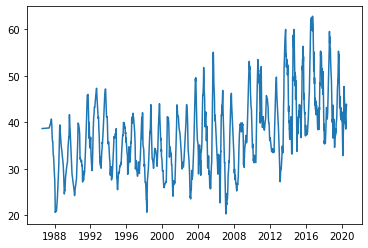

In [6]:
plt.plot(dates, tas)

In [21]:
arima = statsmodels.tsa.arima.model.ARIMA(tas, order=(1, 1, 1))

In [22]:
res = arima.fit()

In [23]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                12391
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5526.371
Date:                Thu, 17 Sep 2020   AIC                         -11046.743
Time:                        16:09:57   BIC                         -11024.469
Sample:                             0   HQIC                        -11039.283
                              - 12391                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9095      0.003    320.439      0.000       0.904       0.915
ma.L1         -0.5083      0.004   -130.903      0.000      -0.516      -0.501
sigma2         0.0240   6.16e-05    389.494      0.0

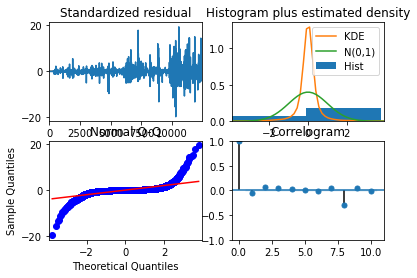

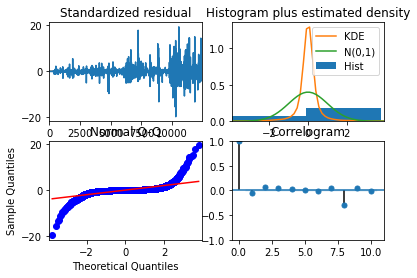

In [43]:
res.plot_diagnostics()